## Machine Learning intro
- Supervised learning
  - Models designed to infer a relationship between input and **labeled** data.      
  - We define the **target** as labels in data that we wish to model (e.g.  population as a function of year)</p>
- Unsupervised learning
  - Find patterns and relationships from **unlabeled** data 
  - This may involve clustering (e.g. group objects that share certain degree of similarity), dimensionality reduction and more.  
  - *Not part of the course*.</p>
- Reinforcement learning
  - Models to infer optimal behavior in some (potentially) mathematically unknown environment
  - Needs no labeling, and suboptimal behavior is corrected through experience (penalty/reward).
  - *Not part of the course*.

### Supervised learning
- Regression:
    - Predict a numeric value (the target can be thought of as ’continuous’)
    - Target data type will typically be float
    - Example of targets:  income, life expectancy, education length (years)


- Classification:
    - Distinguish between non-numeric target categories (the target is binary or a catagory/factor)
    - Target data type can be be str, bool or int
    - Examples of target:  kind of education (linguistics, math), mode of transportation

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
cols = ['survived','class', 'sex', 'sibsp', 'age', 'alone']
titanic_sub = pd.get_dummies(titanic[cols].dropna(), drop_first=True).astype(np.int64)  

X = titanic_sub.drop('survived', axis=1)
y = titanic_sub.survived

In [14]:
print(titanic)
print(titanic_sub)
print(X)
print(y)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [15]:
X = np.random.normal(size=(3, 2)) # feature matrix
y = np.array([1, -1, 1]) # target vector
w = np.random.normal(0,0.001, size=(3)) # weight vector
print('X:\n',X)
print('y:',y)
print('w:',w)


X:
 [[1.46315617 0.4738384 ]
 [0.33093357 0.03922839]
 [0.42912915 0.73204006]]
y: [ 1 -1  1]
w: [ 0.00021357 -0.00063788  0.00064374]


In [16]:
# compute net-input 
z = w[0] + X.dot(w[1:]) # (w[0]: bias, w[1:]: other weights, X: features)  w第一项+X矩阵点乘w的第二项和后面所有项。不知道为什么要这样算

# unit step-function
positive = z>0 # compute prediction (boolean)
y_hat = np.where(positive, 1, -1)  # convert prediction  if z>0, 赋1，if z<=0, 赋-1

# compute errors
e = y - y_hat # compute errors
print(e)

[ 2 -2  0]


In [17]:
# learning rate
eta = 0.001 # η

# update weights 
w[1:] += eta*X.T.dot(e) # 按sigma_w_k = η*X^T(y-φ(z))迭代
w[0] += eta*e.sum()  # 迭代error
print(w[1:])
print(w[0])

[0.00162657 0.00151296]
0.00021357440635075907


In [26]:
X = np.random.normal(size=(3, 2)) # feature matrix
y = np.array([1, -1, 1]) # target vector
w = np.random.normal(0,0.001, size=(3)) # weight vector

# learning rate
eta = 0.0001 

error = np.inf  # 无限位小数
k = 1

while error>0:  # 只要有error，就继续迭代
    z = w[0] + X.dot(w[1:])
    positive = z>0
    
    y_hat = np.where(positive, 1, -1) # if z>0, 赋1，if z<=0, 赋-1
    e = y - y_hat
    
    w[1:] += eta*X.T.dot(e)  # 按sigma_w_k = η*X^T(y-φ(z))迭代
    w[0] += eta*e.sum()  # 视频中说是因为一个matrix中a row of ones点乘了error.
    
    error = abs(y-y_hat).sum()    # y-y_hat绝对值累加
    
    if k == 1:
        print(k,y-y_hat,w)
        
    k += 1

print(k-1,y-y_hat, w)

1 [ 0 -2  0] [ 0.00074169 -0.00128688  0.00101874]
6 [0 0 0] [-5.83100274e-05 -1.21857653e-03  1.08970473e-03]


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


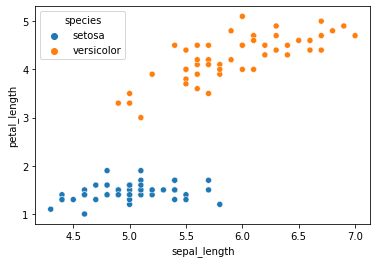

In [56]:
iris = sns.load_dataset('iris').iloc[:100] # drop virginica species
sns.scatterplot(iris.sepal_length, iris.petal_length, hue=iris.species);

In [57]:
# keep petal_length and sepal_length (no need to add constant column, is automatically added in Perceptron algorithm that we apply)
X = iris.iloc[:, [0, 2]].values # 第一项和第三项的值，即sepal_length和petal_length
y = np.where(iris.species=='setosa', 1, -1) # convert to 1 for setosa, -1 for versicolor

In [210]:
import itertools
# 相当多的算法
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#调整子图位置大小

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#stacking利器：
#绘制学习曲线
from mlxtend.plotting import plot_learning_curves
#画出logistic模型决策边界
from mlxtend.plotting import plot_decision_regions

In [60]:
clf = Perceptron(n_iter_no_change=20, eta0=0.000001) # initialize the perceptron 
# clf: short for classifier (classification model), 
# n_iter: number of times to run through all observation
# eta: learning rate (very low for purposes of illustration)

clf.fit(X,y) # fit the perceptron (estimate the model on training data)


Perceptron(eta0=1e-06, n_iter_no_change=20)

Number of errors: 0


<AxesSubplot:>

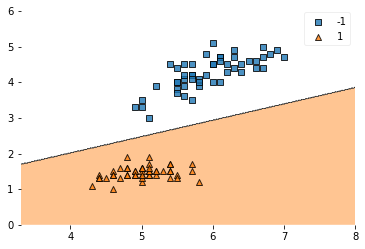

In [62]:
print('Number of errors: %i' % sum(clf.predict(X)!=y))

# we plot the decisions
plot_decision_regions(X,y,clf)

In [78]:
# errors_功能可能是集成在loss_function_ 里了
'''
f,ax = plt.subplots(figsize=(12, 4))
ax.set_xticks(range(21))
ax.plot(range(1, len(clf.errors_) + 1),clf.errors_, marker='o')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Number of errors')


print(clf.w_)
'''

"\nf,ax = plt.subplots(figsize=(12, 4))\nax.set_xticks(range(21))\nax.plot(range(1, len(clf.errors_) + 1),clf.errors_, marker='o')\nax.set_xlabel('Number of iterations')\nax.set_ylabel('Number of errors')\n\n\nprint(clf.w_)\n"

### back to titanic

In [190]:
X = titanic_sub.drop('survived', axis=1).values
y = titanic_sub.survived.replace(0,-1).values
X[:5], y[:5]

(array([[ 1, 22,  0,  0,  1,  1],
        [ 1, 38,  0,  0,  0,  0],
        [ 0, 26,  1,  0,  1,  0],
        [ 1, 35,  0,  0,  0,  0],
        [ 0, 35,  1,  0,  1,  1]], dtype=int64),
 array([-1,  1,  1,  1, -1], dtype=int64))

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=161193) # test的数量占总体的0.2

In [204]:
for n in range(11):
    clf2 = Perceptron(n_iter_no_change=max(50*n,1), eta0=0.0001) 
    clf2.fit(X_train, y_train)
    acc_test = np.mean(y_test-clf2.predict(X_test)==0)
    acc_train = np.mean(y_train-clf2.predict(X_train)==0)
    print(max(50*n,1), round(acc_test,2), round(acc_train,2))


1 0.66 0.59
50 0.7 0.65
100 0.78 0.76
150 0.78 0.76
200 0.71 0.65
250 0.71 0.65
300 0.62 0.66
350 0.82 0.81
400 0.82 0.8
450 0.62 0.67
500 0.73 0.69


#### Perceptron vs. Adaline
The difference lies in how we update the weights (e.g. how the algorithms learns)

    - Perceptron used an ad-hoc rule due to non-differentiability and Adaline minimizes sum-of-squared residuals (see PML p. 38)
#### Adaline vs. Sigmoid
The difference lies in cost-functions and thereby how we update the weights (e.g. how the algorithms learns)

    - Adaline minimizes sum-of-squared residuals and Logistic Regression maximizes log-likelihood (see PML p. 65)

In [92]:
from sklearn.linear_model import LogisticRegression

# estimate model on train data, evaluate on test data
clf = LogisticRegression() # note try default values

clf.fit(X_train,y_train) # model training

y_hat = clf.predict(X_test) # Use model to predict test target
accuracy = (y_hat==y_test).mean() # Evaluate performance

print('Model accuracy is:', np.round(accuracy,3))

Model accuracy is: 0.825


### Exercise

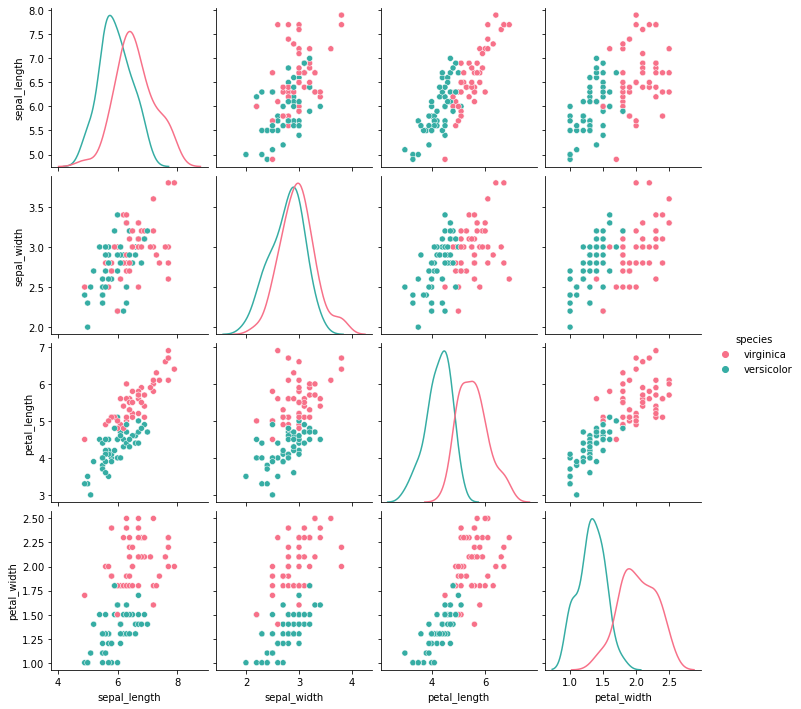

In [40]:
iris = sns.load_dataset('iris')
iris = iris.query("species == 'virginica' | species == 'versicolor'").sample(frac=1, random_state = 3)
X = np.array(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
y = np.array(iris['species'].map({'virginica': 1, 'versicolor': -1}))
sns.pairplot(iris, hue="species", palette="husl", diag_kws = {'shade': False})

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=161193) # test的数量占总体的0.2

In [175]:
w = np.random.normal(0,0.01, size=4+1) # weight vector
w

array([ 0.00575417,  0.00018368, -0.00691528, -0.0135478 ,  0.02064952])

In [176]:
y_train


array([-1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,
       -1, -1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,
        1,  1], dtype=int64)

In [177]:
# compute net-input 
z_train = w[0] + X_train.dot(w[1:]) # (w[0]: bias, w[1:]: other weights, X: features)
print(z_train)
# unit step-function
positive = z_train>0 # compute prediction (boolean)
y_hat_train = np.where(positive, 1, -1)  # convert prediction
print(y_hat_train)
# compute errors
e_train = y_train - y_hat_train # compute errors
print(e_train)

[-0.04668234 -0.0442099  -0.03329078 -0.03648754 -0.03983497 -0.04604619
 -0.05171145 -0.04395386 -0.05920715 -0.03392575 -0.03787059 -0.03983441
 -0.04033008 -0.04376027 -0.04847968 -0.04175971 -0.04266464 -0.04715289
 -0.04883609 -0.05964716 -0.04057197 -0.04856333 -0.04606601 -0.04654447
 -0.04493672 -0.02852617 -0.03519921 -0.04143423 -0.04674818 -0.0429094
 -0.04557204 -0.03930958 -0.06166547 -0.04969403 -0.04985427 -0.04194484
 -0.04515351 -0.03831143 -0.05184147 -0.04097496 -0.04315129 -0.0463958
 -0.03671565 -0.04171141 -0.04399059 -0.05025554 -0.04308628 -0.04297552
 -0.04483587 -0.04872499 -0.03207817 -0.04126322 -0.04518997 -0.04512206
 -0.04448035 -0.04982572 -0.05138338 -0.04453573 -0.05565684 -0.04228316
 -0.04174987 -0.03588902 -0.04330953 -0.06445084 -0.03950859 -0.047945
 -0.04318886 -0.04171141 -0.05185138 -0.03649489]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -

In [178]:
'''
# from sklearn.linear_model import LogisticRegression
# estimate model on train data, evaluate on test data
clf = Perceptron() # note try default values

clf.fit(X_train,y_train) # model training

y_hat = clf.predict(X_test) # Use model to predict test target
'''
accuracy_train = (y_hat_train==y_train).mean() # Evaluate performance

print('Model accuracy is:', np.round(accuracy_train,3))

Model accuracy is: 0.557


In [179]:
def loop(X_train,y_train,n_iter,w,eta):
    errors = 0
    errorseq = list()
    k = 1

    while k < n_iter:
        for xi,yi in zip(X_train,y_train):
            z = w[0] + X_train.dot(w[1:])
            positive = z>0

            y_hat_train = np.where(positive, 1, -1)
            e_train = y_train - y_hat_train


            w[1:] += eta*X_train.T.dot(e_train)
            w[0] += eta*e_train.sum()
            errors = abs(y_train - y_hat_train).sum()
            errorseq.append(errors)
        k += 1
 
    return k,w,errorseq
        

In [180]:
k1,w1,errorseq1 = loop(X_train,y_train,200,w,0.1)
print(k1,w1,errorseq1)

200 [ -73.99424583 -156.71981632 -130.02691528  220.0864522   198.64064952] [62, 78, 62, 78, 62, 78, 62, 78, 62, 78, 62, 78, 62, 78, 62, 78, 62, 78, 62, 78, 62, 78, 62, 78, 62, 56, 62, 78, 62, 78, 62, 76, 62, 48, 62, 78, 62, 78, 62, 78, 62, 76, 62, 56, 62, 78, 62, 76, 62, 76, 62, 58, 62, 78, 62, 76, 62, 72, 62, 66, 62, 76, 62, 70, 62, 72, 62, 70, 62, 72, 62, 66, 62, 76, 62, 70, 62, 72, 62, 70, 62, 72, 62, 70, 62, 72, 62, 66, 62, 76, 62, 70, 62, 72, 62, 70, 62, 72, 62, 68, 62, 74, 62, 70, 62, 72, 62, 70, 62, 70, 62, 72, 62, 70, 62, 72, 62, 70, 60, 66, 60, 72, 60, 66, 58, 66, 58, 66, 58, 66, 58, 70, 58, 58, 50, 60, 52, 60, 50, 58, 50, 58, 44, 48, 34, 28, 14, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 6, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 8, 4, 4, 4, 4, 4, 4, 2, 8, 4, 4, 4, 4, 2, 2, 4, 2, 8, 4, 4, 4, 4, 2, 2, 4, 2, 8, 4, 2, 2, 4, 4, 4, 4, 4, 2, 8, 4, 2, 2, 4, 4, 4, 4, 4, 2, 8, 6, 2, 4, 4, 4, 4, 4, 2, 8,

In [181]:
# compute net-input 
z_test = w1[0] + X_test.dot(w1[1:]) # (w[0]: bias, w[1:]: other weights, X: features)
print(z_test)
# unit step-function
positive = z_test>0 # compute prediction (boolean)
y_hat_test = np.where(positive, 1, -1)  # convert prediction
print(y_hat_test)
# compute errors
e_test = y_test - y_hat_test # compute errors
accuracy_test = (y_hat_test==y_test).mean() # Evaluate performance

print('Model accuracy is:', np.round(accuracy_test,3))

[ 1.48970859e+02  1.15801689e+02  8.52748585e+01  5.89770528e+01
 -1.29571282e+02 -1.99850627e+02 -2.29060001e+02  2.30757054e+02
  2.28417128e+02 -2.18130572e+02  1.60004335e+02 -2.37335909e+02
 -2.21385899e+02  2.05349073e+02 -3.48479667e-01  5.96088301e+01
 -1.00117868e+01  7.48801305e+01 -1.48190582e+02 -5.00257090e+00
  1.42525937e+02  1.99608436e+02  9.12721674e+01  9.78511085e+01
  9.14531183e+01 -3.36423946e+02 -1.93184599e+02  1.82121239e+02
  3.56663203e+02  2.08699843e+01]
[ 1  1  1  1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1  1 -1  1 -1 -1  1  1  1  1
  1 -1 -1  1  1  1]
Model accuracy is: 0.9


### Beyond Perceptron

In [217]:
clf2 = LogisticRegression()
clf2.fit(X_train,y_train) # model training

y_hat2 = clf2.predict(X_test) # Use model to predict test target
train_score = accuracy_score(y_train, clf2.predict(X_train))
test_score = accuracy_score(y_test, clf2.predict(X_test))

print(f"On the training data we get a score of {round(train_score, 2)}, while the score on the test data is {round(test_score, 2)}")

On the training data we get a score of 0.79, while the score on the test data is 0.83


In [225]:
def net_input(X, W):
    return W[0] + np.dot(X,W[1:])

def random_weights(X):
    rgen = np.random.RandomState(seed = 161193)
    W = rgen.normal(loc = 0, scale = 0.01, size = X.shape[1]+1)    
    return W

W = random_weights(X_train)

def ada_activation(Z):
    return Z
    
def ada_predict(X, W):
    return np.sign(ada_activation(net_input(X, W)) >= 0.0, 1, -1)    # 1(linProd > 0)

In [227]:
def ada_cost(X, y, W):
    errors_sq = (y - ada_activation(net_input(X, W)))**2
    return errors_sq.sum() / 2.0


def ada_cost_derivative(X, y, W):
    errors = y - ada_activation(net_input(X, W))
    return np.array([errors.sum()] + list(X.T.dot(errors)))

ada_cost_derivative(X_train, y_train, random_weights(X_train))

array([  -9.70272684,  -29.43660028, -361.09049742,  -50.24551898,
         16.61695295, -108.25817206, -151.01442103])

C:\Users\dell\AppData\Local\Temp/ipykernel_8596/3686005161.py:2: RuntimeWarning: overflow encountered in square
  errors_sq = (y - ada_activation(net_input(X, W)))**2


[nan nan nan nan nan nan nan]


'\n# 我的代码_(:3\ndef ada_loop(X_train,y_train,n_iter,w,eta):\n    errors = 0\n    errorseq = list()\n    k = 1\n\n    while k < n_iter:\n        for xi,yi in zip(X_train,y_train):\n            z = net_input(X_train,w)\n            e_train = y_train - z\n            \n            w = w + eta*ada_cost_derivative(X_train,y_train,w)\n\n            errorseq.append(ada_cost(X_train,y_train,w))\n            \n        k += 1\n \n    return k,w,errorseq\n\nk2,w2,errorseq2 = ada_loop(X_train, y_train, 5, random_weights(X_train),0.0001)\nplt.plot(errorseq2)\n'

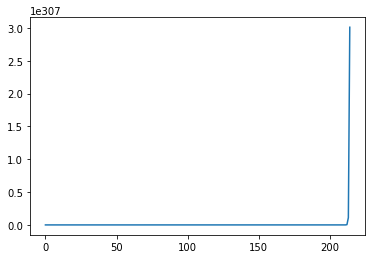

In [238]:
### BEGIN SOLUTION
def AdaLine(X, y, n_iter = 10000, eta = 0.00001):
    costseq = []
    W =  random_weights(X)
    
    for i in range(n_iter):
        nip = net_input(X, W)    
        output = ada_activation(nip)  # =nip

        W = W + eta * ada_cost_derivative(X, y, W)
        costseq.append(ada_cost(X,y, W))
        
    return W, costseq

w_trained, costs = AdaLine(X_train, y_train)
plt.plot(costs)
print(w_trained)
### END SOLUTION

'''
# 我的代码_(:3
def ada_loop(X_train,y_train,n_iter,w,eta):
    errors = 0
    errorseq = list()
    k = 1

    while k < n_iter:
        for xi,yi in zip(X_train,y_train):
            z = net_input(X_train,w)
            e_train = y_train - z
            
            w = w + eta*ada_cost_derivative(X_train,y_train,w)

            errorseq.append(ada_cost(X_train,y_train,w))
            
        k += 1
 
    return k,w,errorseq

k2,w2,errorseq2 = ada_loop(X_train, y_train, 5, random_weights(X_train),0.0001)
plt.plot(errorseq2)
'''

>  Write a function that scales each of the variables in $X$ using the formula 
$$
x_j^{new} = \frac{x_j^{old} - \mu_j}{\sigma_j}
$$
> rerun the adaline function on the scaled variables.

[ 0.19645436 -0.17929274 -0.30467896 -0.01076646 -0.44795099 -0.78987198
 -0.96993611]


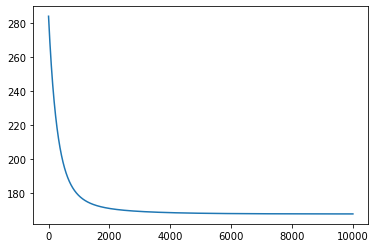

In [242]:
### BEGIN SOLUTION
def standardScaler(X, y):
    """ Scales the input. (Horrible code for illustration)    
    """
    X_new = X.copy()

    for i in range(X.shape[1]):  # 在X的行数范围循环
        xj = X[:,i]  # xj是X第一列的所有项

        stdev = np.std(xj)
        mean = np.mean(xj)
        
        X_new[:,i] = (xj - mean)/stdev  # 归一化
    
    y_stdev = np.std(y)
    y_mean = np.mean(y)
    
    y_new = (y.copy() - y_mean)/y_stdev # 把y也scale了
    
    return X_new, y_new

X_scaled, y_scaled = standardScaler(X_train,y_train)

w_trained, costs = AdaLine(X_scaled, y_scaled)
print(w_trained)
plt.plot(costs)